In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.interpolate as scpi
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

In [3]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,100_001)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

### Variation de p

Residus à chaque itération:
 [0.01741739989816584, 0.0019265823354661503, 0.000860045994742431, 0.0006786357988902746, 0.0004279563540164289, 0.00025366567105689037, 0.00014516104599227242, 7.745803080984753e-05, 3.7411377818639145e-05, 1.6090131123492544e-05, 6.06407217653283e-06, 1.942867867089261e-06, 4.943396194807127e-07, 9.393777533293339e-08, 4.372220010970179e-08, 3.048104712444375e-08, 1.8903345308129405e-08, 1.1788634499180221e-08, 7.005902164520758e-09]
Residus à chaque itération:
 [0.07820406923022974, 0.013481904431672765, 0.0022651775142623135, 0.0006961774146920108, 0.0004981161068715801, 0.00039490959839447246, 0.0003065377684950689, 0.0002335009074180019, 0.00017508990402748296, 0.00012948676144288758, 9.466617938802474e-05, 6.862271333771296e-05, 4.94867002665245e-05, 3.561650496961921e-05, 2.56512310314255e-05, 1.8519058290411042e-05, 1.3411774241591615e-05, 9.740785347134833e-06, 7.087999641955645e-06, 5.1606083913069815e-06, 3.7542481956290596e-06, 2.72548716083747

Residus à chaque itération:
 [0.12634783219727208, 0.04927402772771315, 0.021946452774293645, 0.010788535055713089, 0.005693644032978618, 0.0031718948313889882, 0.001847969002982767, 0.0011198245552670617, 0.0007029248248405146, 0.00045520310467877205, 0.00030276605514147027, 0.00020587558424905436, 0.0001424926923316822, 0.00010000425532877871, 7.094974511181024e-05, 5.0765993062135256e-05, 3.657104387864797e-05, 2.6491637882780235e-05, 1.9280107102253798e-05, 1.4088821351698262e-05, 1.0332828184232933e-05, 7.603478221517206e-06, 5.612544922679161e-06, 4.1551967707872e-06, 3.0849800391222144e-06, 2.296653540594306e-06, 1.714267333453706e-06, 1.2828042129530148e-06, 9.622749253633975e-07, 7.235214937533278e-07, 5.452197256788635e-07, 4.1172930731220747e-07, 3.1154624864578417e-07, 2.361853248265245e-07, 1.793706406782806e-07, 1.3644771578876614e-07, 1.0395530005194775e-07, 7.931268138178984e-08, 6.05907189121224e-08, 4.63437289178795e-08, 3.548571332623544e-08, 2.719898426877421e-08, 2

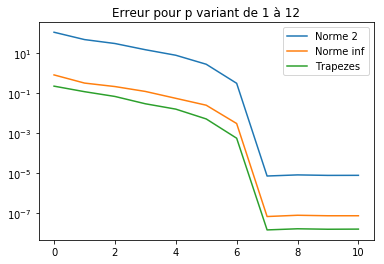

In [4]:
h = 1
epsilon=0.001
p = np.arange(1,12,1)
Prod_poly_10_7_h = FT.Prod_poly_10_7_h
name = str(Prod_poly_10_7_h).split(' ')[1]

Err = np.zeros((3,len(p)))

for i in range(len(p)):
    px,fx,nb_iter = test_approx(p[i],Prod_poly_10_7_h,h,epsilon,0,0)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)
    
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()
plt.title("Erreur pour p variant de 1 à 12")
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/eps/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationP/png/"+name+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
plt.show()

### Variation de h

In [10]:
def test_ordre_fonction(f,p,epsilon):
    h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
    for i in range(len(h)):
        px,fx,nb_iter = test_approx(p,f,h[i],epsilon,0)
        Err[0,i] = npl.norm(px-fx)
        Err[1,i] = npl.norm(px-fx,np.inf)
        Err[2,i] = trapezes(px-fx)
    
    logErr = np.log10(Err)
    logh = np.log10(h)
    plt.plot(logh,logErr[1,:])
    plt.show()
    penteExist = int(input("Entrer 1 s'il y a une partie lineaire, 0 si on est à precision machine, -1 sinon\nRéponse : "))
    if penteExist == 0 : 
        print("Pas de droite : precision machine")
    elif penteExist == -1 : 
        print("Methode d'ordre : ", 0)
    else : 
        h_min = float(input("Entrer la valeur min de la partie lineaire :\n(Entrer 0 si pas de debut de droite)\nRéponse : "))
        h_max = float(input("Entrer la valeur max de la partie lineaire :\n(Entrer 0 si pas de fin de droite)\nRéponse : "))
        if h_min != 0. : 
            index_min = np.where(logh>=h_min) 
            logh = logh[index_min[0]]
            logErr = logErr[:,index_min[0]]
        if h_max != 0. : 
            index_max = np.where(logh<=h_max) 
            logh = logh[index_max[0]]
            logErr = logErr[:,index_max[0]]
        affine = np.polyfit(logh,logErr[1,:],1)
                
        print("\n\n################################################################################")
        print("######################            Test ordre              ######################")  
        print("################################################################################")
        print("Fonction  Polynome de degré")
        print(" %s  %11g"%(str(f).split(' ')[1],2*p+1))
        plt.plot(logh,logErr[1,:],label="Norme inf")
        plt.plot(logh,logErr[0,:],label="Norme 2")
        plt.plot(logh,logErr[2,:],label="Trapezes")
        plt.plot(logh, round(affine[0])*logh,label="Ordre :"+str(int(affine[0])))
        plt.legend()
        plt.show()    
        print("==> Methode d'ordre : ", round(affine[0]))

Residus à chaque itération:
 [8.760093815650181e-07, 2.4362109217179974e-10]
Residus à chaque itération:
 [1.6910877216099033e-09]
Residus à chaque itération:
 [3.917526663142875e-12]
Residus à chaque itération:
 [1.1102000745713069e-16]
Residus à chaque itération:
 [1.57008441505587e-16]
Residus à chaque itération:
 [2.2204432178589127e-16]
Residus à chaque itération:
 [1.5700921391945388e-16]
Residus à chaque itération:
 [1.570092378881989e-16]
Residus à chaque itération:
 [1.922962682476855e-16]


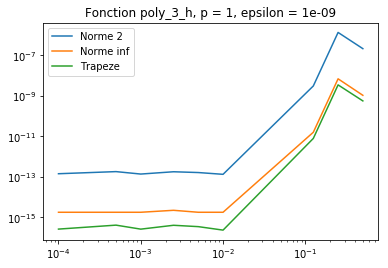

Residus à chaque itération:
 [1.4383846754386674e-08, 5.749214804895357e-13]
Residus à chaque itération:
 [1.4457919007839688e-12]
Residus à chaque itération:
 [2.936211206149693e-16]
Residus à chaque itération:
 [1.1102228232824939e-16]
Residus à chaque itération:
 [1.1102229995734513e-16]
Residus à chaque itération:
 [1.110223021500901e-16]
Residus à chaque itération:
 [1.57009245840139e-16]
Residus à chaque itération:
 [1.570092458648493e-16]
Residus à chaque itération:
 [1.5700924586834931e-16]


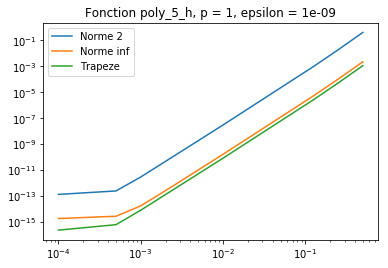

Residus à chaque itération:
 [3.448488489753305e-07, 1.4025894748528482e-10]
Residus à chaque itération:
 [1.219179940192905e-09]
Residus à chaque itération:
 [4.647897353996785e-12]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [7.850472259830889e-17]
Residus à chaque itération:
 [9.614815384926947e-17]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [0.0]


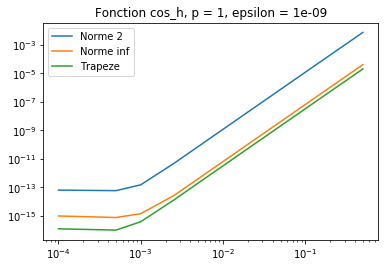

Residus à chaque itération:
 [2.1565943684621207e-05, 5.7303549427511544e-08, 1.5123493019047955e-10]
Residus à chaque itération:
 [2.033468736162781e-06, 1.620280589953332e-09]
Residus à chaque itération:
 [1.591622492094106e-07, 3.499791376693037e-11]
Residus à chaque itération:
 [8.127719609794842e-12]
Residus à chaque itération:
 [5.130390711174111e-13]
Residus à chaque itération:
 [3.235162770899731e-14]
Residus à chaque itération:
 [7.767676969932932e-16]
Residus à chaque itération:
 [1.109945525239382e-16]
Residus à chaque itération:
 [1.1101675157290007e-16]


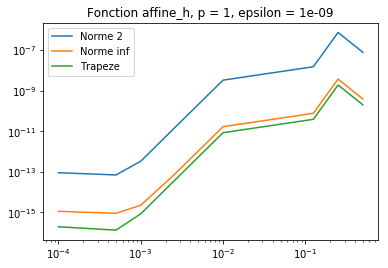

In [8]:
h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
p = 1
epsilon = 1e-9
Err = np.zeros((3,len(h)))
fonctions_test = FT.fonctions("Sans Arg",'Classic')

for f in fonctions_test : 
    for i in range(len(h)):
        px,fx,nb_iter = test_approx(p,f,h[i],epsilon,0)
        Err[0,i] = npl.norm(px-fx)
        Err[1,i] = npl.norm(px-fx,np.inf)
        Err[2,i] = trapezes(px-fx)

    plt.loglog(h,Err[0,:],label="Norme 2")
    plt.loglog(h,Err[1,:],label="Norme inf")
    plt.loglog(h,Err[2,:],label="Trapeze")
    name = str(f).split(' ')[1]
    plt.title("Fonction "+name+", p = "+str(p)+", epsilon = "+str(epsilon))
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/eps/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".eps", format='eps')
    plt.savefig("./Images/EtudesParamOpe/Parametres/variationH/png/"+name+", p = "+str(p)+", epsilon = "+str(epsilon)+".png", format='png')
    plt.legend()
    plt.show()
    #test_ordre(h,Err)

Residus à chaque itération:
 [3.448488489753305e-07, 1.4025894748528482e-10]
Residus à chaque itération:
 [1.219179940192905e-09]
Residus à chaque itération:
 [4.647897353996785e-12]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [7.850472259830889e-17]
Residus à chaque itération:
 [9.614815384926947e-17]
Residus à chaque itération:
 [0.0]
Residus à chaque itération:
 [0.0]


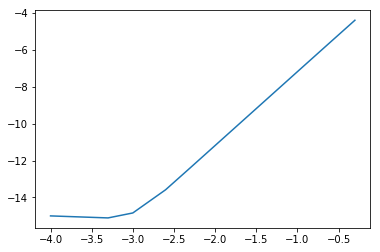

Entrer 1 s'il y a une partie lineaire, 0 si on est à precision machine, -1 sinon
Réponse : 1
Entrer la valeur min de la partie lineaire :
(Entrer 0 si pas de debut de droite)
Réponse : -3
Entrer la valeur max de la partie lineaire :
(Entrer 0 si pas de fin de droite)
Réponse : 0


################################################################################
######################            Test ordre              ######################
################################################################################
Fonction  Polynome de degré
 cos_h            3


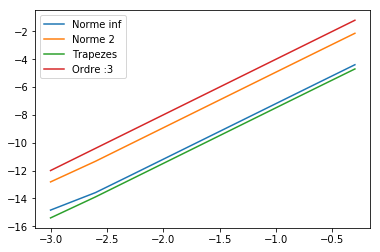

==> Methode d'ordre :  4.0


In [11]:
test_ordre_fonction(fonctions_test[2],1,1e-9)

###### Pb sur le dernier : stagne à 10-2
Origine du pb possible : nb de points insuffisants et/ou epsilon trop grand (si h grand la fonction trop proche de 0 => valeur cachée dans epsilon

## Variation de epsilon

In [12]:
def test_approx_eps(p,f,h,epsilon,affichage=None,s=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.figure(figsize=(18,5))
        axes = plt.subplot(1,2,2)
        ordmax = 3*max(epsilon,np.min(fx))
        axes.set_ylim(-epsilon, ordmax)
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,epsilon*np.ones(len(x)),'r',label='valeur de epsilon')
        plt.legend()
        plt.title("Graphe zoome")
        plt.subplot(1,2,1)
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,epsilon*np.ones(len(x)),'r')
        plt.legend()   
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx

Residus à chaque itération:
 [2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2.383879512569518, 2

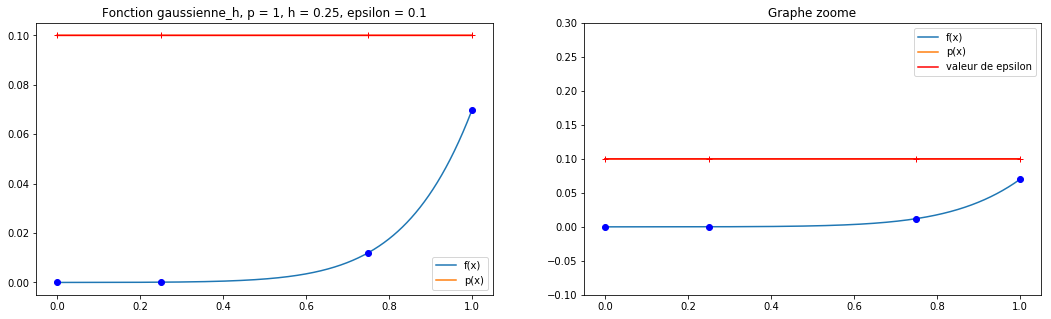

Residus à chaque itération:
 [0.24400620537609266, 0.22444527550565224, 0.22959270443488655, 0.22601552924504234, 0.22754648330642, 0.22674345929182485, 0.22712392093153413, 0.22693464584505313, 0.22702656972710755, 0.22698139907861983, 0.22700346829253762, 0.22699265547837846, 0.2269979459271448, 0.22699535569319781, 0.22699662346817603, 0.22699600286284943, 0.22699630663956935, 0.22699615793980377, 0.22699623072747968, 0.22699619509800253, 0.2269962125385083, 0.22699620400142223, 0.22699620818030103, 0.22699620613475094, 0.22699620713604196, 0.22699620664591275, 0.2269962068858297, 0.2269962067683909, 0.22699620682587685, 0.2269962067977377, 0.22699620681151184, 0.22699620680476945, 0.2269962068080697, 0.2269962068064542, 0.22699620680724508, 0.22699620680685795, 0.22699620680704738, 0.2269962068069547, 0.22699620680700008, 0.2269962068069779, 0.22699620680698873, 0.22699620680698335, 0.226996206806986, 0.22699620680698473, 0.22699620680698537, 0.22699620680698504, 0.2269962068069851

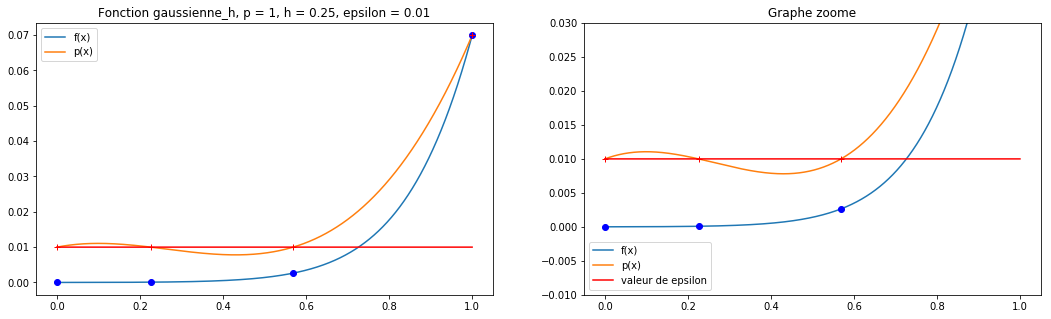

Residus à chaque itération:
 [0.022377234600159862, 0.022059546105058087, 0.0220428348429005, 0.022015578088834285, 0.02199899779514147, 0.02198881311660201, 0.021982510972455408, 0.02197859358105137, 0.021976151678154955, 0.021974626847153032, 0.021973673632672882, 0.021973077343696305, 0.021972704171882275, 0.02197247056952748, 0.0219723243119368, 0.02197223273097475, 0.02197217538267687, 0.021972139469507157, 0.021972116979057606, 0.021972102894294566, 0.02197209407354803, 0.021972088549418026, 0.021972085089831797, 0.021972082923198036, 0.02197208156629901, 0.021972080716512226, 0.0219720801843149, 0.021972079851014712, 0.02197207964227814, 0.021972079511552254, 0.021972079429682267, 0.021972079378409396, 0.021972079346298606, 0.021972079326188516, 0.02197207931359412, 0.021972079305706604, 0.02197207930076687, 0.021972079297673256, 0.021972079295735813, 0.02197207929452244, 0.021972079293762537, 0.021972079293286637, 0.021972079292988594, 0.021972079292801934, 0.021972079292685034

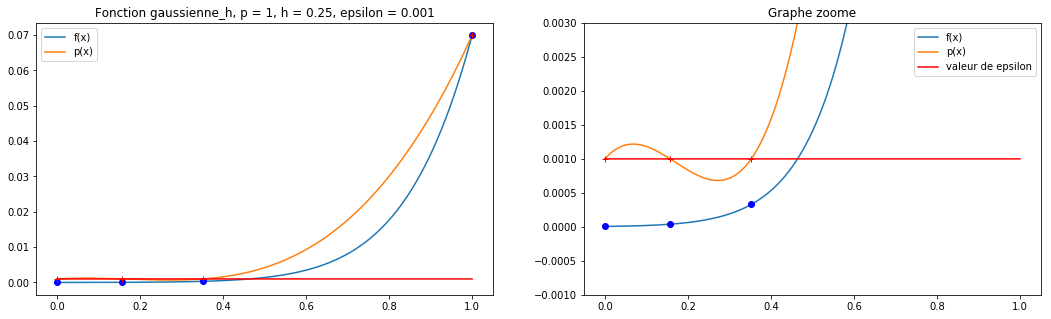

Residus à chaque itération:
 [0.01621726294939062, 0.0018990101480369627, 0.0018251189996480537, 0.0018433305519633503, 0.0018519804875640185, 0.0018573594352761123, 0.0018615290821542237, 0.0018649565653241812, 0.0018677992300481158, 0.001870152678473581, 0.0018720942542239673, 0.0018736906008504262, 0.0018749992507455454, 0.0018760694121225836, 0.0018769427607529378, 0.0018776542931823407, 0.0018782331903903083, 0.001878703644109707, 0.0018790856158099943, 0.0018793955136187492, 0.0018796467830965464, 0.0018798504144687306, 0.0018800153727075953, 0.0018801489586728105, 0.0018802571100622425, 0.0018803446507037861, 0.0018804154960750672, 0.00188047282209584, 0.0018805192033374172, 0.0018805567259163308, 0.0018805870795301116, 0.0018806116323716365, 0.0018806314920304938, 0.0018806475549524176, 0.0018806605465736775, 0.0018806710538671043, 0.0018806795517205136, 0.0018806864243071156, 0.0018806919823927213, 0.001880696477348347, 0.0018807001124928314, 0.0018807030522725158, 0.001880705

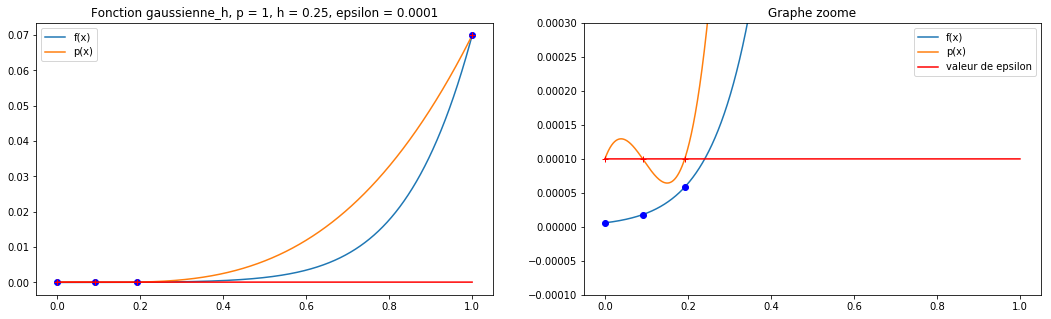

Residus à chaque itération:
 [0.025830326277516642, 0.0015197446789597191, 0.00013765340787622938, 9.523229778003824e-05, 9.93266129411683e-05, 0.00010091647760805618, 0.00010143864167980223, 0.00010160650600649635, 0.00010166016044061838, 0.00010167728002702726, 0.00010168273942294675, 0.00010168448011362203, 0.00010168503509078626, 0.0001016852120288081, 0.00010168526843994453, 0.00010168528642483399, 0.00010168529215873876, 0.00010168529398680986, 0.00010168529456963141, 0.0001016852947554453, 0.000101685294814686, 0.0001016852948335732, 0.00010168529483959462, 0.00010168529484151428, 0.00010168529484212652, 0.00010168529484232147, 0.00010168529484238377, 0.00010168529484240368, 0.00010168529484241, 0.00010168529484241195, 0.00010168529484241265, 0.0001016852948424129, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0.00010168529484241306, 0

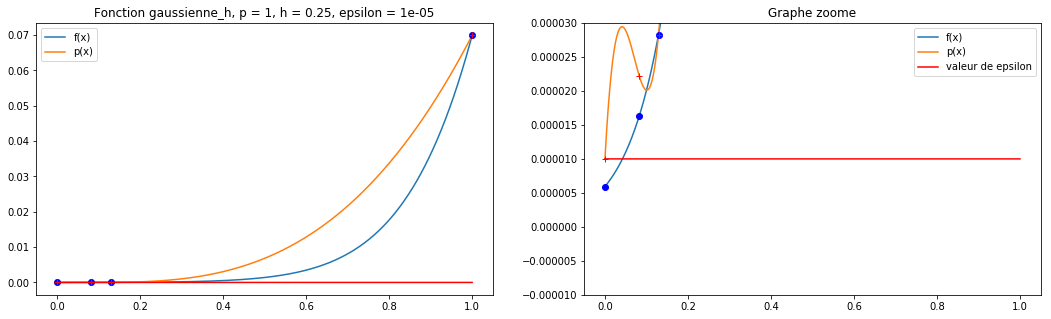

Residus à chaque itération:
 [0.026005106744335593, 0.0014999972786206444, 0.0001341211263175504, 9.402883992485695e-05, 9.874273218767568e-05, 0.00010050295289597505, 0.00010107453931628404, 0.00010125698889388215, 0.00010131496594110946, 0.00010133336481415793, 0.00010133920127470751, 0.00010134105247348335, 0.00010134163961042324, 0.00010134182582786852, 0.00010134188488870869, 0.00010134190362045826, 0.00010134190956142201, 0.00010134191144565814, 0.00010134191204326288, 0.000101341912232799, 0.00010134191229291259, 0.00010134191231197795, 0.00010134191231802469, 0.00010134191231994278, 0.00010134191232055109, 0.00010134191232074393, 0.00010134191232080483, 0.00010134191232082445, 0.00010134191232083081, 0.0001013419123208326, 0.00010134191232083343, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083

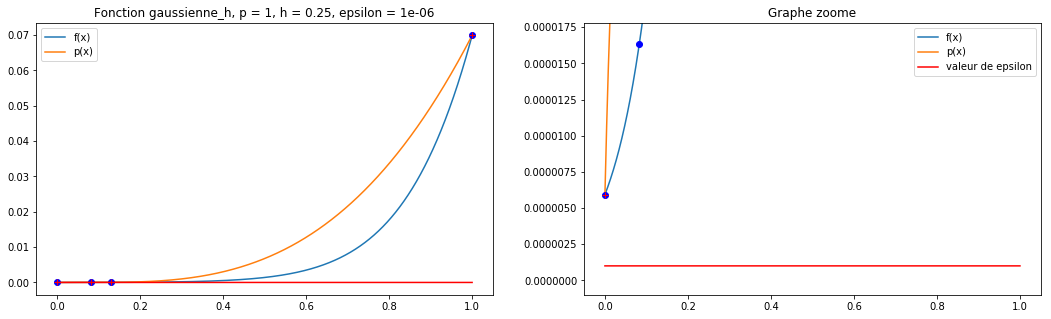

Residus à chaque itération:
 [0.026005106744335593, 0.0014999972786206444, 0.0001341211263175504, 9.402883992485695e-05, 9.874273218767568e-05, 0.00010050295289597505, 0.00010107453931628404, 0.00010125698889388215, 0.00010131496594110946, 0.00010133336481415793, 0.00010133920127470751, 0.00010134105247348335, 0.00010134163961042324, 0.00010134182582786852, 0.00010134188488870869, 0.00010134190362045826, 0.00010134190956142201, 0.00010134191144565814, 0.00010134191204326288, 0.000101341912232799, 0.00010134191229291259, 0.00010134191231197795, 0.00010134191231802469, 0.00010134191231994278, 0.00010134191232055109, 0.00010134191232074393, 0.00010134191232080483, 0.00010134191232082445, 0.00010134191232083081, 0.0001013419123208326, 0.00010134191232083343, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083

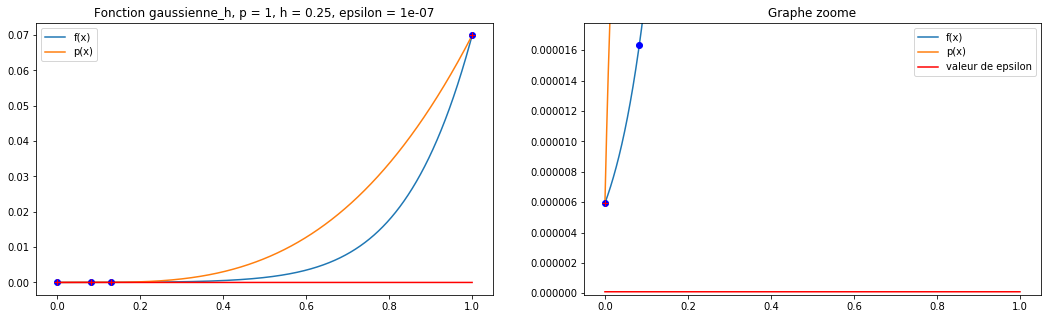

Residus à chaque itération:
 [0.026005106744335593, 0.0014999972786206444, 0.0001341211263175504, 9.402883992485695e-05, 9.874273218767568e-05, 0.00010050295289597505, 0.00010107453931628404, 0.00010125698889388215, 0.00010131496594110946, 0.00010133336481415793, 0.00010133920127470751, 0.00010134105247348335, 0.00010134163961042324, 0.00010134182582786852, 0.00010134188488870869, 0.00010134190362045826, 0.00010134190956142201, 0.00010134191144565814, 0.00010134191204326288, 0.000101341912232799, 0.00010134191229291259, 0.00010134191231197795, 0.00010134191231802469, 0.00010134191231994278, 0.00010134191232055109, 0.00010134191232074393, 0.00010134191232080483, 0.00010134191232082445, 0.00010134191232083081, 0.0001013419123208326, 0.00010134191232083343, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083

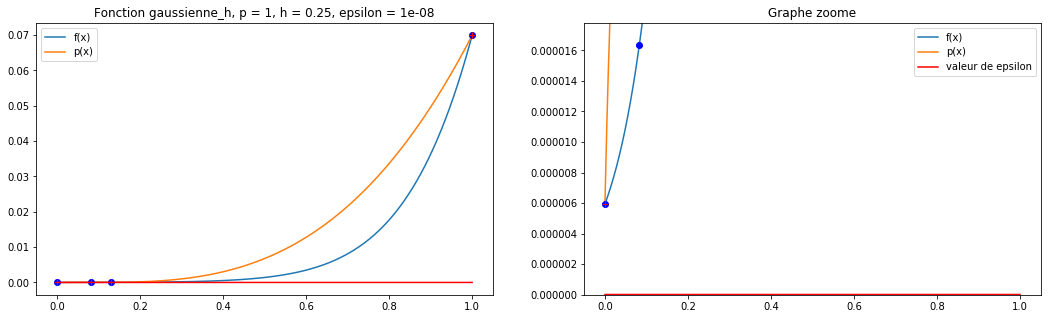

Residus à chaque itération:
 [0.026005106744335593, 0.0014999972786206444, 0.0001341211263175504, 9.402883992485695e-05, 9.874273218767568e-05, 0.00010050295289597505, 0.00010107453931628404, 0.00010125698889388215, 0.00010131496594110946, 0.00010133336481415793, 0.00010133920127470751, 0.00010134105247348335, 0.00010134163961042324, 0.00010134182582786852, 0.00010134188488870869, 0.00010134190362045826, 0.00010134190956142201, 0.00010134191144565814, 0.00010134191204326288, 0.000101341912232799, 0.00010134191229291259, 0.00010134191231197795, 0.00010134191231802469, 0.00010134191231994278, 0.00010134191232055109, 0.00010134191232074393, 0.00010134191232080483, 0.00010134191232082445, 0.00010134191232083081, 0.0001013419123208326, 0.00010134191232083343, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083328, 0.00010134191232083

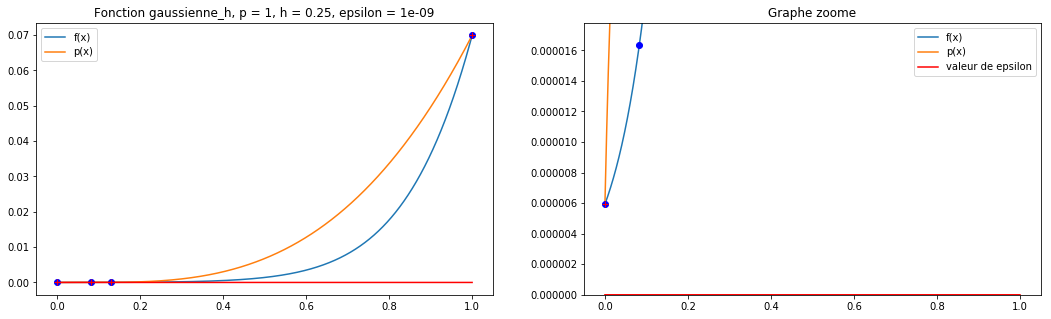

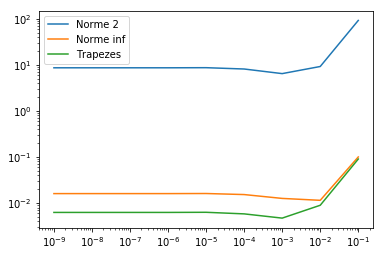

In [13]:
h = 1/4 
p = 1
epsilon = 1/(10**np.arange(1,10,1))
Err = np.zeros((3,len(epsilon)))
gaussienne_h = FT.gaussienne_h
name = str(gaussienne_h).split(' ')[1]

for i in range(len(epsilon)):
    px,fx = test_approx_eps(p,gaussienne_h,h,epsilon[i],"VariationEps",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)

plt.loglog(epsilon,Err[0,:],label="Norme 2")
plt.loglog(epsilon,Err[1,:],label="Norme inf")
plt.loglog(epsilon,Err[2,:],label="Trapezes")
plt.legend()
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/eps/"+name+", p = "+str(p)+", h = "+str(h)+".eps", format='eps')
plt.savefig("./Images/EtudesParamOpe/Parametres/variationEps/png/"+name+", p = "+str(p)+", h = "+str(h)+".png", format='png')
plt.show()

## Effets de Gibbs

Residus à chaque itération:
 [0.18105401572043184, 0.35616211013413335, 0.09454638392574474, 0.03221587215790159, 0.0220988627817922, 0.019346973746239313, 0.018302694589404454, 0.01771340768664648, 0.017298297289361667, 0.016987017160823462, 0.0167582887810937, 0.01659791557247859, 0.016491127615069257, 0.01642334808203149, 0.01638223187035755, 0.016358518940960298, 0.016345629352667868, 0.016339011147582606, 0.01633568555326719, 0.016333909235833312, 0.016332806832564085, 0.01633201282535066, 0.016331403159207537, 0.01633094047516043, 0.01633060554914954, 0.016330376563698523, 0.016330228252848116, 0.01633013613009137, 0.016330079926519327, 0.016330044915005455, 0.01633002157130969, 0.016330004405595035, 0.016329990628473623, 0.016329979021853736, 0.016329969143180998, 0.016329960846512087, 0.01632995404173294, 0.01632994860411212, 0.016329944362916116, 0.016329941121532934, 0.016329938682678707, 0.016329936867242364, 0.01632993552413956, 0.016329934532691045, 0.016329933800271812, 0

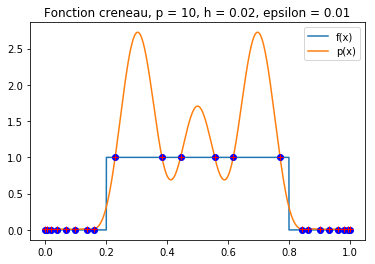

Residus à chaque itération:
 [0.18802365560097586, 0.3157516054258885, 0.0791189835278725, 0.02715936455835837, 0.018968615003055005, 0.016981397327720586, 0.016266660758301087, 0.01586666157379697, 0.015583590326515165, 0.015370040724287307, 0.015209297402128931, 0.015091096987682998, 0.015006635870183296, 0.014947857787897466, 0.014907816422173563, 0.014881023952079409, 0.014863419645392877, 0.014852079350152415, 0.01484490937991532, 0.014840432358707457, 0.01483764278618145, 0.014835888713473078, 0.014834766113146297, 0.01483403203498059, 0.014833541803208594, 0.014833208420965464, 0.014832978341431926, 0.014832817644937468, 0.014832704252349189, 0.01483262347546706, 0.01483256538969536, 0.01483252321864167, 0.014832492302077036, 0.014832469416534298, 0.014832452319188703, 0.014832439438445876, 0.014832429663282451, 0.01483242219986259, 0.01483241647410936, 0.01483241206556456, 0.014832408662421692, 0.014832406030797054, 0.014832403993533997, 0.014832402415386777, 0.0148324011924926

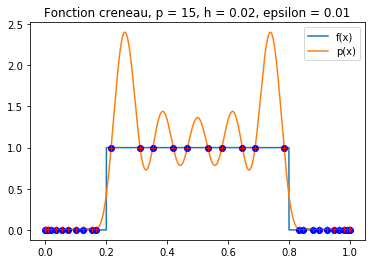

Residus à chaque itération:
 [0.19826204130218256, 0.26854702242840306, 0.06265762477210601, 0.023157796857469683, 0.01761097207926351, 0.016119735065793766, 0.015431056431441603, 0.014980301639037968, 0.01464828499633449, 0.014398071604453427, 0.014210356205809335, 0.014071634102668942, 0.013971164646391265, 0.013899820609248293, 0.013849914083268626, 0.013815371253969998, 0.013791706395054197, 0.013775705721762276, 0.013765046328095385, 0.013758028871225608, 0.013753429243192634, 0.013750400347395603, 0.013748381841598106, 0.013747015365455804, 0.013746075162294409, 0.013745418596934926, 0.013744954172741236, 0.013744621991546167, 0.013744382048679797, 0.01374420716771882, 0.01374407863419493, 0.013743983418990616, 0.013743912366014934, 0.013743858985118674, 0.013743818636591729, 0.01374378797482846, 0.013743764566121213, 0.013743746624524964, 0.013743732828230796, 0.01374372219105337, 0.01374371397179139, 0.013743707609733783, 0.013743702678324107, 0.013743698851531755, 0.0137436958

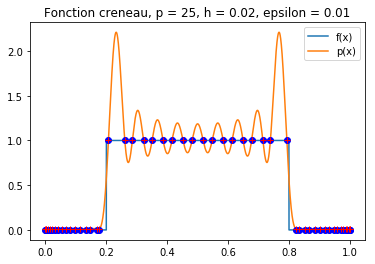

Residus à chaque itération:
 [0.39795399082397304, 0.24558640058868764, 0.054515656184975746, 0.021201789432824223, 0.016419690078953036, 0.01499814084936912, 0.01441438015070036, 0.01408135191777299, 0.013846325313630904, 0.013668579401873476, 0.013533630622335688, 0.013432504253762913, 0.01335778020031938, 0.013303205526234239, 0.013263737888470597, 0.01323545382042781, 0.013215350881906814, 0.013201151287933382, 0.013191150222657263, 0.013184099029850715, 0.01317910524303112, 0.013175543918785336, 0.013172982979786304, 0.013171125075314438, 0.01316976523320002, 0.013168761369172633, 0.013168014240915484, 0.013167453942226272, 0.013167030798627076, 0.013166709198035236, 0.013166463381428637, 0.013166274550235885, 0.013166128864582198, 0.013166016048268139, 0.013165928409419483, 0.013165860147489897, 0.013165806858658799, 0.013165765179565648, 0.013165732528219195, 0.013165706913749721, 0.013165686795395615, 0.013165670977058296, 0.013165658527819661, 0.013165648721603982, 0.013165640

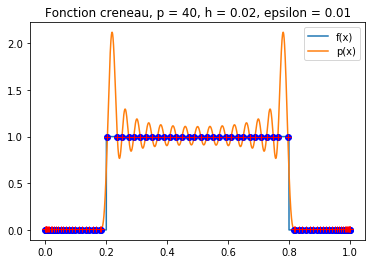

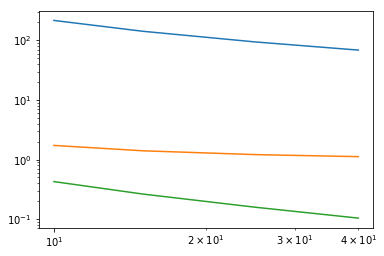

In [16]:
def creneau(x,h):
    x = x*h
    return (x<0.2*h)*0 + (x>0.8*h)*0 + (0.2*h<=x)*(x<=0.8*h)*1 

p = [10,15,25,40]
h  = 0.02
epsilon = 1e-2
Err = np.zeros((3,len(p)))
#creneau = FT.creneau_h

for i in range(len(p)):
    px,fx,nb_iter = test_approx(p[i],creneau,h,epsilon,"effetGibbs",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)

plt.loglog(p,Err[0,:],label="Norme 2")
plt.loglog(p,Err[1,:],label="Norme inf")
plt.loglog(p,Err[2,:],label="Trapezes")

nécessité de choisir alpha pour pas que undershoot soit negatif, sinon ne fonctionne plus

In [ ]:
logp = np.log10(p)
logErr = np.log10(Err)
plt.plot(logp,logErr[1,:])
plt.show()
p_min = float(input("Entrer la valeur min de partie lineaire : \n (Entrer 0 si pas de debut de droite)\nRéponse : "))
p_max = float(input("Entrer la valeur max de partie lineaire : \n (Entrer 0 si pas de fin de droite)\nRéponse : "))
if p_min != 0. : 
    index_min = np.where(logp>=p_min) 
    logp = logp[index_min[0]]
    logErr = logErr[:,index_min[0]]
if p_max != 0. : 
    index_max = np.where(logp<=p_max) 
    logp = logp[index_max[0]]
    logErr = logErr[:,index_max[0]]
affine = np.polyfit(logp,logErr[1,:],1)
plt.plot(logp,logErr[1,:],label="Norme inf")
plt.plot(logp,logErr[0,:],label="Norme 2")
plt.plot(logp,logErr[2,:],label="Trapezes")
plt.plot(logp, round(affine[0])*logp,label="Ordre :"+str(int(affine[0])))
plt.show()

print("==> Pente : ", round(affine[0]))

## Mise en évidence de la modification du polynome interpolant au fil des itérations

In [24]:

def Newton_Raphson (X0,p,f,h,epsilon,s=None,eps=1e-8,itermax=100):
    # reconstruit le polynome le plus interpolant
    epsi = epsi_S(p)
    #initialisation
    Xjac = np.copy(X0) 
    Xjac = np.concatenate((Xjac[:p],Xjac[p+2:]))
    X = np.copy(Xjac)
    k=0
    err=2*eps
    Residus = []
    #X_hist = [X0]
    while itermax > k and err > eps :
        d = npl.solve(Jp(p,f,h,Xjac,epsilon),f_theta(X,p,f,h,epsilon))
        X = X - d
        if s != None and s != 0 :
            X = S(p,epsi,X)
        k+=1
        X_test = np.concatenate(( X[:p],[1],[0],X[p:]))
        fx = f(X_test,h)
        ap = a_alpha(p,f,h,X_test[:p+1],X_test,epsilon)
        bp = b_beta(p,f,h,X_test[p+1:],X_test,epsilon)
        px = pn(X_test,ap,bp)
        err = npl.norm(fx-px)/npl.norm(fx) #npl.norm(X-X0)/npl.norm(X0)
        Residus += [err]
        if np.any(1<=X) or np.any(X<=0):
            raise ValueError
        #X_hist += [X_test,ap,bp]
    return X,k,Residus

def approxh(x,p,f,h,epsilon,init=None,s=None,ResidusNewton=None):
    if init is not None and isinstance(init,type(init_X)) : 
        X0 = init(p)
    else :
        X0 = init_X(p)
    X,itermax,residus = Newton_Raphson(X0,p,f,h,epsilon,s)
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),[X,a_alpha,b_beta],itermax,X0

In [46]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,100_001)
    px, param_interpol,nb_iter,X0 = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    #interp, a_alpha,b_beta = param_interpol
    #Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    #Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    Ap = a_alpha(p,f,h,X0[:p+1],x,epsilon)
    Bp = b_beta(p,f,h,X0[p+1:],x,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x) (last iter)")
        #plt.plot(interp,f(interp,h),'ob')
        #plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,pn(x,Ap,Bp),label="p(x) (first iter)")
        #plt.plot(X0,np.zeros(len(X0)),'+')
        plt.legend()
        plt.show()
    
    return px,fx,nb_iter

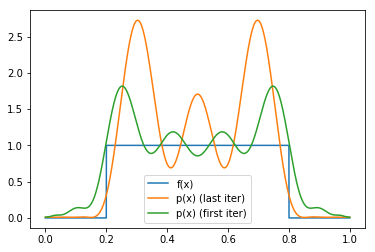

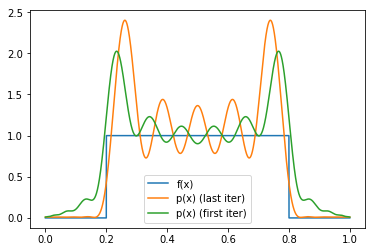

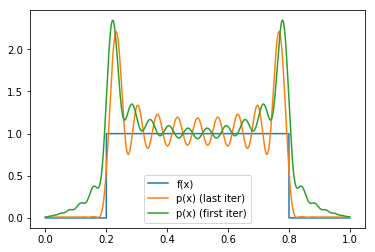

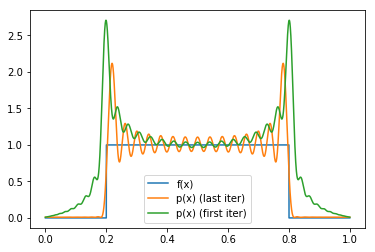

In [47]:
def creneau(x,h):
    x = x*h
    return (x<0.2*h)*0 + (x>0.8*h)*0 + (0.2*h<=x)*(x<=0.8*h)*1 

p = [10,15,25,40]
h  = 0.02
epsilon = 1e-2
Err = np.zeros((3,len(p)))
#creneau = FT.creneau_h

for i in range(len(p)):
    px,fx,nb_iter = test_approx(p[i],creneau,h,epsilon,"effetGibbs",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = trapezes(px-fx)